In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [128]:
# import datasets
train_df = pd.read_csv('/Users/carlicema/Documents/gitub_desktop/Titanic/train.csv')
test_df = pd.read_csv('/Users/carlicema/Documents/gitub_desktop/Titanic/test.csv')
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [129]:
train_df.info() # Age: 177 missing; Embarked: 2 missing
print('---------------------------------------')
test_df.info() # Age: 86 missing; Embarked: 1 missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
---------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null 

In [130]:
# drop column 'Name', 'PassengerId', 'Ticket' since they won't be useful for data analysis
# drop column 'Cabin' since it has too much missing data
train_df = train_df.drop(['PassengerId', 'Name','Ticket', 'Cabin'], axis = 1)
test_df = test_df.drop(['Name', 'Ticket', 'Cabin'], axis = 1)

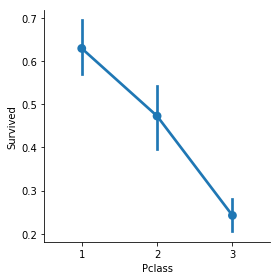

In [131]:
# Pclass

sns.factorplot('Pclass', 'Survived', data = train_df)

# create dummy valuables for Pclass
train_pclass_dum = pd.get_dummies(train_df['Pclass'])
train_pclass_dum.columns = ['Class1', 'Class2', 'Class3']

test_pclass_dum = pd.get_dummies(test_df['Pclass'])
test_pclass_dum.columns = ['Class1', 'Class2', 'Class3']

train_df = train_df.join(train_pclass_dum)
test_df = test_df.join(test_pclass_dum)

# drop column 'Pclass'
train_df = train_df.drop('Pclass', axis = 1)
test_df = test_df.drop('Pclass', axis = 1)

In [132]:
# sex
# create dummy variables for sex
train_df['Sex'].loc[train_df['Sex'] == 'male'] = 0
train_df['Sex'].loc[train_df['Sex'] == 'female'] = 1

test_df['Sex'].loc[test_df['Sex'] == 'male'] = 0
test_df['Sex'].loc[test_df['Sex'] == 'female'] = 1

/Users/carlicema/Documents/My_Studio/Anaconda/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [133]:
# age
# 177 missing values in train dataset, 86 missing values in test dataset
# calculate the mean, sd and the number of missing value for column age
train_mean_age = train_df['Age'].mean()
train_std_age = train_df['Age'].std()
train_number_age = train_df['Age'].isnull().sum()

test_mean_age = test_df['Age'].mean()
test_std_age = test_df['Age'].std()
test_number_age = test_df['Age'].isnull().sum()

# generate random values between (mean - std) and (mean + std)
train_random = np.random.randint(train_mean_age - train_std_age, train_mean_age + train_std_age, size = train_number_age)
test_random = np.random.randint(test_mean_age - test_std_age, test_mean_age + test_std_age, size = test_number_age)

# drop missing values and fill them with random values
train_df['Age'].dropna()
train_df['Age'][np.isnan(train_df['Age'])] = train_random
test_df['Age'].dropna()
test_df['Age'][np.isnan(test_df['Age'])] = test_random

train_df['Age'] = train_df['Age'].astype(int)
test_df['Age'] = test_df['Age'].astype(int)

# get the age range
train_df['Age'].loc[train_df['Age'] <= 15] = 0
train_df['Age'].loc[(train_df['Age'] > 15) & (train_df['Age'] <= 30)] = 1
train_df['Age'].loc[(train_df['Age'] > 30) & (train_df['Age'] <= 45)] = 2
train_df['Age'].loc[(train_df['Age'] > 45) & (train_df['Age'] <= 60)] = 3

test_df['Age'].loc[test_df['Age'] <= 15] = 0
test_df['Age'].loc[(test_df['Age'] > 15) & (test_df['Age'] <= 30)] = 1
test_df['Age'].loc[(test_df['Age'] > 30) & (test_df['Age'] <= 45)] = 2
test_df['Age'].loc[(test_df['Age'] > 45) & (test_df['Age'] <= 60)] = 3

/Users/carlicema/Documents/My_Studio/Anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/carlicema/Documents/My_Studio/Anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/carlicema/Documents/My_Studio/Anaconda/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_inde

In [134]:
# Family
# combine Sibsp and Parch
train_df['Family']= train_df['SibSp'] + train_df['Parch']
train_df['Family'].loc[train_df['Family'] > 0] = 1 # with family member
train_df['Family'].loc[train_df['Family'] == 0] = 0 # alone

test_df['Family']= test_df['SibSp'] + test_df['Parch']
test_df['Family'].loc[test_df['Family'] > 0] = 1 # with family member
test_df['Family'].loc[test_df['Family'] == 0] = 0 # alone

/Users/carlicema/Documents/My_Studio/Anaconda/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [135]:
# fare
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)

train_df['Fare'].loc[train_df['Fare'] <= 102.466] = 0
train_df['Fare'].loc[(train_df['Fare'] > 102.466) & (train_df['Fare'] <= 204.932)] = 1
train_df['Fare'].loc[(train_df['Fare'] > 204.932) & (train_df['Fare'] <= 307.398)] = 2
train_df['Fare'].loc[(train_df['Fare'] > 307.398) & (train_df['Fare'] <= 409.863)] = 3
train_df['Fare'].loc[train_df['Fare'] > 409.863] = 4

test_df['Fare'].loc[test_df['Fare'] <= 102.466] = 0
test_df['Fare'].loc[(test_df['Fare'] > 102.466) & (test_df['Fare'] <= 204.932)] = 1
test_df['Fare'].loc[(test_df['Fare'] > 204.932) & (test_df['Fare'] <= 307.398)] = 2
test_df['Fare'].loc[(test_df['Fare'] > 307.398) & (test_df['Fare'] <= 409.863)] = 3
test_df['Fare'].loc[test_df['Fare'] > 409.863] = 4

train_df['Fare'] = train_df['Fare'].astype(int)
test_df['Fare'] = test_df['Fare'].astype(int)

/Users/carlicema/Documents/My_Studio/Anaconda/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


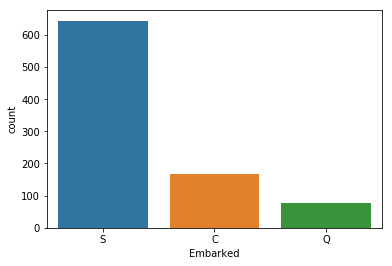

In [136]:
# embarked
sns.countplot(train_df['Embarked'])

# fill the 2 missing values with 'S' since it is the most occurred value in this column
train_df['Embarked'] = train_df['Embarked'].fillna('S')
train_embarked_dum = pd.get_dummies(train_df['Embarked'])
train_embarked_dum.columns = ['S', 'C', 'Q']
train_df.join(train_embarked_dum)
train_df = train_df.drop('Embarked', axis = 1)

test_embarked_dum = pd.get_dummies(test_df['Embarked'])
test_embarked_dum.columns = ['S', 'C', 'Q']
test_df.join(test_embarked_dum)
test_df = test_df.drop('Embarked', axis = 1)

In [137]:
train_df.head(10)

,Survived,Sex,Age,SibSp,Parch,Fare,Class1,Class2,Class3,Family
0,0,0,1,1,0,0,0,0,1,1
1,1,1,2,1,0,0,1,0,0,1
2,1,1,1,0,0,0,0,0,1,0
3,1,1,2,1,0,0,1,0,0,1
4,0,0,2,0,0,0,0,0,1,0
5,0,0,2,0,0,0,0,0,1,0
6,0,0,3,0,0,0,1,0,0,0
7,0,0,0,3,1,0,0,0,1,1
8,1,1,1,0,2,0,0,0,1,1
9,1,1,0,1,0,0,0,1,0,1


In [138]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

In [139]:
# prepare training datasets
train_x = train_df.drop('Survived', axis = 1)
train_y = train_df['Survived']

test_x = test_df.drop('PassengerId', axis = 1).copy()

In [143]:
# logistic regression
logreg = LogisticRegression()
logreg.fit(train_x, train_y)
Y_pred = logreg.predict(test_x)
logreg.score(train_x, train_y)

0.79685746352413023

In [148]:
# random forest
rand_forest = RandomForestClassifier()
rand_forest.fit(train_x, train_y)
y_pred3 = rand_forest.predict(test_x)
rand_forest.score(train_x, train_y)

0.85072951739618408

In [146]:
# guassian distribution
gaus = GaussianNB()
gaus.fit(train_x, train_y)
y_pred2 = gaus.predict(test_x)
gaus.score(train_x, train_y)

0.75869809203142535

In [145]:
# gradient boosting
grad_boost = GradientBoostingClassifier()
grad_boost.fit(train_x, train_y)
y_pred4 = grad_boost.predict(test_x)
grad_boost.score(train_x, train_y)

0.83950617283950613

In [156]:
# random forest has the highest score based on the results above
# use random forest to predict
submission = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': y_pred3})
submission.to_csv('submission.csv', index = False)